个人理解其实就是和级数展开思想一样，任何一组信号都可以表示成一组基信号的叠加和，最小二乘的方法其实就是找该信号在各个基上的投影值。

In [2]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

numpy.poly1d([1,2,3])生成
$$1x^2+2x^1+3x^0$$

In [3]:
#定义目标函数
def ob_func(x):
    return np.sin(2*np.pi*x)
#定义用于拟合的多项式
def fit_func(p,x):
    f=np.poly1d(p)
    return f(x)
#定义残差
def res_func(p,x,y):
    res = fit_func(p,x)-y
    return res

In [8]:
#产生十个点
x=np.linspace(0,1,10)
x_1=np.linspace(0,1,1000)
#目标函数加噪声
y1=ob_func(x)
y=[np.random.normal(0,0.2)+y2 for y2 in y1]

leastsq(func, x0, args=(), Dfun=None, full_output=0, col_deriv=0, ftol=1.49012e-08, xtol=1.49012e-08, gtol=0.0, maxfev=0, epsfcn=0.0, factor=100, diag=None, warning=True)

func：误差函数
x0：表示函数的参数
args（）表示数据点
返回值第一行表示拟合参数

In [22]:
#定义最小二乘方法,M为多项式次数
def fit(M=0):
    x0=np.random.rand(M+1)
    fit_para=leastsq(res_func,x0,args=(x,y))
    print('fit parameters:',fit_para[0])
    #可视化
    plt.plot(x_1,ob_func(x_1),label='obj')
    plt.plot(x_1,fit_func(fit_para[0],x_1),label='fit curve')
    plt.plot(x,y,'bo',label='noise')
    plt.legend()
    return fit_para   

fit parameters: [ 0.01368766]


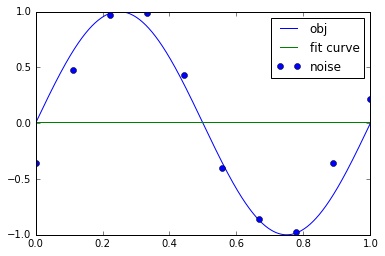

In [23]:
a=fit(M=0)

fit parameters: [-0.91008936  0.46873234]


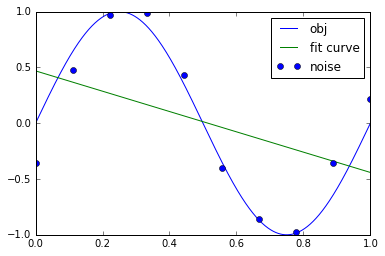

In [24]:
a=fit(M=1)

fit parameters: [ -1.16661880e+04   5.02623225e+04  -9.02392015e+04   8.74929772e+04
  -4.96931135e+04   1.68370463e+04  -3.31926077e+03   3.31086745e+02
  -5.08734074e+00  -3.61004532e-01]


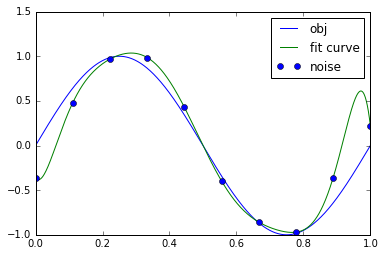

In [27]:
a9=fit(M=9)

过拟合需要加入正则项，参数向量的L2范数或者L1范数
$$
Q(x)=\sum_{i=1}^{n}\left(h\left(x_{i}\right)-y_{i}\right)^{2}+\lambda\|w\|^{2}
$$
L1: regularization*abs(p)

L2: 0.5 * regularization * np.square(p)

In [21]:
regular=0.0001
def res_regu_func(p,x,y):
    res = fit_func(p,x)-y
    res = np.append(res,np.sqrt(0.5*regular*np.square(p)))
    return res

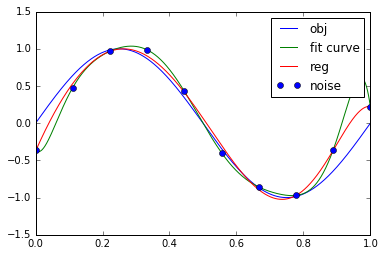

In [34]:
    x0=np.random.rand(9+1)
    fit_para_reg=leastsq(res_regu_func,x0,args=(x,y))
    #可视化
    plt.plot(x_1,ob_func(x_1),label='obj')
    plt.plot(x_1,fit_func(a9[0],x_1),label='fit curve')
    plt.plot(x_1,fit_func(fit_para_reg[0],x_1),label='reg')
    plt.plot(x,y,'bo',label='noise')
    plt.legend()
